In [2]:
# ==========================================================
# Maestría en Ciencia y Análisis de Datos
# Universidad Mayor de San Andrés
# ----------------------------------------------------------
#           Machine Learning y Deep Learning
# ----------------------------------------------------------
#        Rolando Gonzales Martinez, Agosto 2024
# ==========================================================
#  Maquinas de soporte vectorial aplicadas a clasificadores
#             de enfermedades cardiacas
# ==========================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Cargar el conjunto de datos:
url = 'https://raw.githubusercontent.com/rogon666/UMSA/main/AIMLDL/Datos/enfermedades_cardiacas.csv'

# Cargar los datos en un DataFrame
df= pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
print(df.head())

   diagnostico  edad  sexo  dolorpecho  presion  colesterol  azucar  \
0            0    63     1           1      145         233       1   
1            2    67     1           4      160         286       0   
2            1    67     1           4      120         229       0   
3            0    37     1           3      130         250       0   
4            0    41     0           2      130         204       0   

   electrocardiograma  ritmocardiaco  angina  caidast  pendientest  \
0                   2            150       0      2.3            3   
1                   2            108       1      1.5            2   
2                   2            129       1      2.6            2   
3                   0            187       0      3.5            3   
4                   2            172       0      1.4            1   

   numerovasos  talasemia  
0          0.0        6.0  
1          3.0        3.0  
2          2.0        7.0  
3          0.0        3.0  
4          0

In [6]:
# Pre-procesamiento y preparacion:

# Imputar los valores faltantes
df['talasemia'] = df['talasemia'].fillna(df['talasemia'].mean())
df['numerovasos'] = df['numerovasos'].fillna(df['numerovasos'].mean())

# Preparar los datos para el modelo
X = df.drop('diagnostico', axis=1)
y = df['diagnostico'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
proporcion_muestra_test = 0.3 # 30%
semilla = 911
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=proporcion_muestra_test, 
                                                    random_state=semilla)

# Escalar los datos (estandarizacion)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo SVM
model = SVC(kernel='linear', random_state=semilla)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[42  9]
 [ 2 38]]


In [12]:
# Calcular los estadísticos basados en la matriz de confusión
# Verdaderos positivos (TP), Falsos positivos (FP), Verdaderos negativos (TN), Falsos negativos (FN)
conf_matrix = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Exactitud (Accuracy)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Precisión (Precision)
precision = TP / float(TP + FP)

# Sensibilidad (Recall)
recall = TP / float(TP + FN)

# Especificidad (Specificity)
specificity = TN / float(TN + FP)

# Puntuación F1 (F1-Score)
f1_score = 2 * (precision * recall) / (precision + recall)

# Tasa de Falsos Positivos (False Positive Rate)
false_positive_rate = FP / float(FP + TN)

# Mostrar los resultados con etiquetas
resultados = {
    "Exactitud (Accuracy)": accuracy,
    "Precisión (Precision)": precision,
    "Sensibilidad (Recall)": recall,
    "Especificidad (Specificity)": specificity,
    "Puntuación F1 (F1-Score)": f1_score,
    "Tasa de Falsos Positivos (False Positive Rate)": false_positive_rate
}
resultados


{'Exactitud (Accuracy)': 0.8791208791208791,
 'Precisión (Precision)': 0.8085106382978723,
 'Sensibilidad (Recall)': 0.95,
 'Especificidad (Specificity)': 0.8235294117647058,
 'Puntuación F1 (F1-Score)': 0.8735632183908046,
 'Tasa de Falsos Positivos (False Positive Rate)': 0.17647058823529413}

<Figure size 1000x700 with 0 Axes>

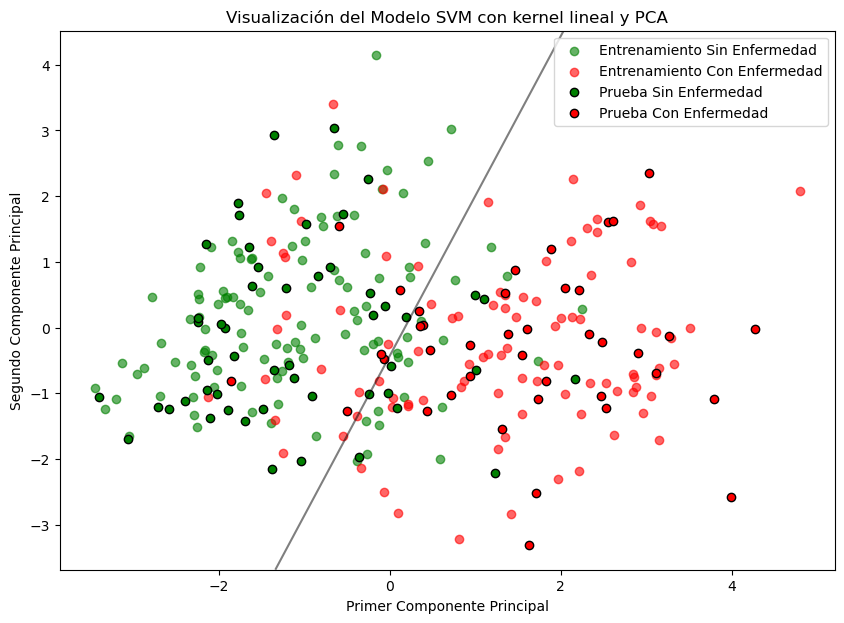

{'Exactitud (Accuracy)': 0.8351648351648352,
 'Precisión (Precision)': 0.7906976744186046,
 'Sensibilidad (Recall)': 0.85,
 'Especificidad (Specificity)': 0.8235294117647058,
 'Puntuación F1 (F1-Score)': 0.8192771084337349,
 'Tasa de Falsos Positivos (False Positive Rate)': 0.17647058823529413}

In [14]:
# Reducir las dimensiones de los datos a 2 dimensiones utilizando PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el modelo SVM en el espacio reducido
modelo_pca = SVC(kernel='linear', 
                 random_state=semilla)
modelo_pca.fit(X_train_pca, y_train)

# Predicciones en el espacio reducido
y_pred_pca = modelo_pca.predict(X_test_pca)

# Graficar el modelo SVM
plt.figure(figsize=(10, 7))

# Crear un mapa de colores personalizado para los casos
color_map = {0: 'green', 1: 'red'}

# Graficar los datos de entrenamiento y prueba con colores diferenciados
plt.figure(figsize=(10, 7))

# Datos de entrenamiento
for class_value in np.unique(y_train):
    indices = np.where(y_train == class_value)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1],
                c=color_map[class_value], alpha=0.6, 
                label=f'Entrenamiento {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Datos de prueba
for class_value in np.unique(y_test):
    indices = np.where(y_test == class_value)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1],
                c=color_map[class_value], edgecolors='k', 
                label=f'Prueba {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Dibujar la frontera de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = modelo_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.title('Visualización del Modelo SVM con kernel lineal y PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.show()

# Calcular los estadísticos basados en la matriz de confusión
# Verdaderos positivos (TP), Falsos positivos (FP), Verdaderos negativos (TN), Falsos negativos (FN)
conf_matrix = confusion_matrix(y_test, y_pred_pca)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Exactitud (Accuracy)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Precisión (Precision)
precision = TP / float(TP + FP)

# Sensibilidad (Recall)
recall = TP / float(TP + FN)

# Especificidad (Specificity)
specificity = TN / float(TN + FP)

# Puntuación F1 (F1-Score)
f1_score = 2 * (precision * recall) / (precision + recall)

# Tasa de Falsos Positivos (False Positive Rate)
false_positive_rate = FP / float(FP + TN)

# Mostrar los resultados con etiquetas
resultados = {
    "Exactitud (Accuracy)": accuracy,
    "Precisión (Precision)": precision,
    "Sensibilidad (Recall)": recall,
    "Especificidad (Specificity)": specificity,
    "Puntuación F1 (F1-Score)": f1_score,
    "Tasa de Falsos Positivos (False Positive Rate)": false_positive_rate
}
resultados


<Figure size 1000x700 with 0 Axes>

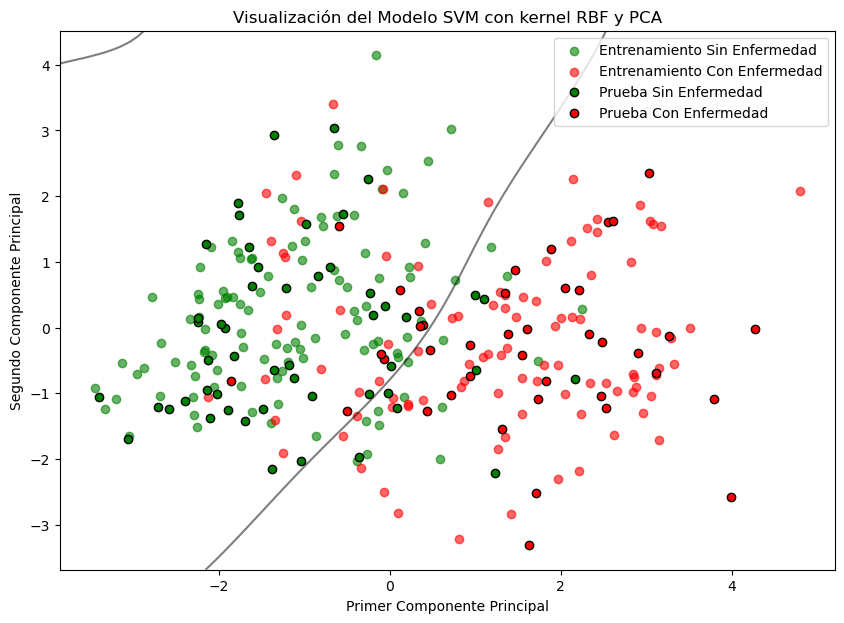

{'Exactitud (Accuracy)': 0.8131868131868132,
 'Precisión (Precision)': 0.7948717948717948,
 'Sensibilidad (Recall)': 0.775,
 'Especificidad (Specificity)': 0.8431372549019608,
 'Puntuación F1 (F1-Score)': 0.7848101265822786,
 'Tasa de Falsos Positivos (False Positive Rate)': 0.1568627450980392}

In [16]:
# Entrenar el modelo SVM con kernel 'rbf' en el espacio reducido
modelo_rbf = SVC(kernel='rbf', 
                 random_state=semilla)
modelo_rbf.fit(X_train_pca, y_train)

# Predicciones en el espacio reducido
y_pred_rbf = modelo_rbf.predict(X_test_pca)

plt.figure(figsize=(10, 7))

# Crear un mapa de colores personalizado para los casos
color_map = {0: 'green', 1: 'red'}

# Graficar los datos de entrenamiento y prueba con colores diferenciados
plt.figure(figsize=(10, 7))

# Datos de entrenamiento
for class_value in np.unique(y_train):
    indices = np.where(y_train == class_value)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1],
                c=color_map[class_value], alpha=0.6, label=f'Entrenamiento {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Datos de prueba
for class_value in np.unique(y_test):
    indices = np.where(y_test == class_value)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1],
                c=color_map[class_value], edgecolors='k', label=f'Prueba {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Dibujar la frontera de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = modelo_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.title('Visualización del Modelo SVM con kernel RBF y PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.show()

# Calcular los estadísticos basados en la matriz de confusión
# Verdaderos positivos (TP), Falsos positivos (FP), Verdaderos negativos (TN), Falsos negativos (FN)
conf_matrix = confusion_matrix(y_test, y_pred_rbf)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Exactitud (Accuracy)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Precisión (Precision)
precision = TP / float(TP + FP)

# Sensibilidad (Recall)
recall = TP / float(TP + FN)

# Especificidad (Specificity)
specificity = TN / float(TN + FP)

# Puntuación F1 (F1-Score)
f1_score = 2 * (precision * recall) / (precision + recall)

# Tasa de Falsos Positivos (False Positive Rate)
false_positive_rate = FP / float(FP + TN)

# Mostrar los resultados con etiquetas
resultados = {
    "Exactitud (Accuracy)": accuracy,
    "Precisión (Precision)": precision,
    "Sensibilidad (Recall)": recall,
    "Especificidad (Specificity)": specificity,
    "Puntuación F1 (F1-Score)": f1_score,
    "Tasa de Falsos Positivos (False Positive Rate)": false_positive_rate
}
resultados

<Figure size 1000x700 with 0 Axes>

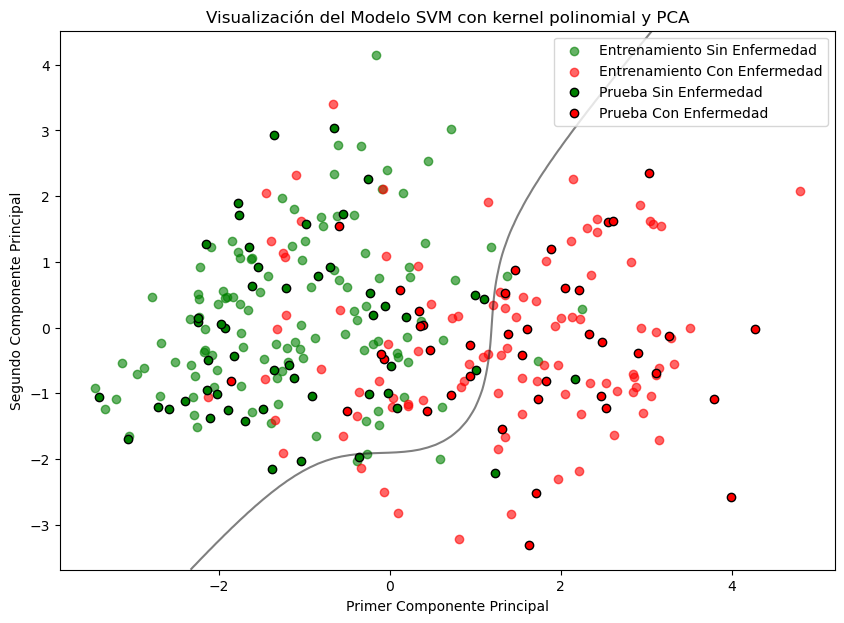

{'Exactitud (Accuracy)': 0.8131868131868132,
 'Precisión (Precision)': 0.896551724137931,
 'Sensibilidad (Recall)': 0.65,
 'Especificidad (Specificity)': 0.9411764705882353,
 'Puntuación F1 (F1-Score)': 0.7536231884057972,
 'Tasa de Falsos Positivos (False Positive Rate)': 0.058823529411764705}

In [20]:
# Entrenar el modelo SVM con kernel polinomial en el espacio reducido
modelo_poly = SVC(kernel='poly', 
                  degree = 3, 
                  random_state=911)
modelo_poly.fit(X_train_pca, y_train)

# Predicciones en el espacio reducido
y_pred_poly = modelo_poly.predict(X_test_pca)

plt.figure(figsize=(10, 7))

# Crear un mapa de colores personalizado para los casos
color_map = {0: 'green', 1: 'red'}

# Graficar los datos de entrenamiento y prueba con colores diferenciados
plt.figure(figsize=(10, 7))

# Datos de entrenamiento
for class_value in np.unique(y_train):
    indices = np.where(y_train == class_value)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1],
                c=color_map[class_value], alpha=0.6, label=f'Entrenamiento {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Datos de prueba
for class_value in np.unique(y_test):
    indices = np.where(y_test == class_value)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1],
                c=color_map[class_value], edgecolors='k', label=f'Prueba {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Dibujar la frontera de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = modelo_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.title('Visualización del Modelo SVM con kernel polinomial y PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.show()

# Calcular los estadísticos basados en la matriz de confusión
# Verdaderos positivos (TP), Falsos positivos (FP), Verdaderos negativos (TN), Falsos negativos (FN)
conf_matrix = confusion_matrix(y_test, y_pred_poly)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Exactitud (Accuracy)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Precisión (Precision)
precision = TP / float(TP + FP)

# Sensibilidad (Recall)
recall = TP / float(TP + FN)

# Especificidad (Specificity)
specificity = TN / float(TN + FP)

# Puntuación F1 (F1-Score)
f1_score = 2 * (precision * recall) / (precision + recall)

# Tasa de Falsos Positivos (False Positive Rate)
false_positive_rate = FP / float(FP + TN)

# Mostrar los resultados con etiquetas
resultados = {
    "Exactitud (Accuracy)": accuracy,
    "Precisión (Precision)": precision,
    "Sensibilidad (Recall)": recall,
    "Especificidad (Specificity)": specificity,
    "Puntuación F1 (F1-Score)": f1_score,
    "Tasa de Falsos Positivos (False Positive Rate)": false_positive_rate
}
resultados

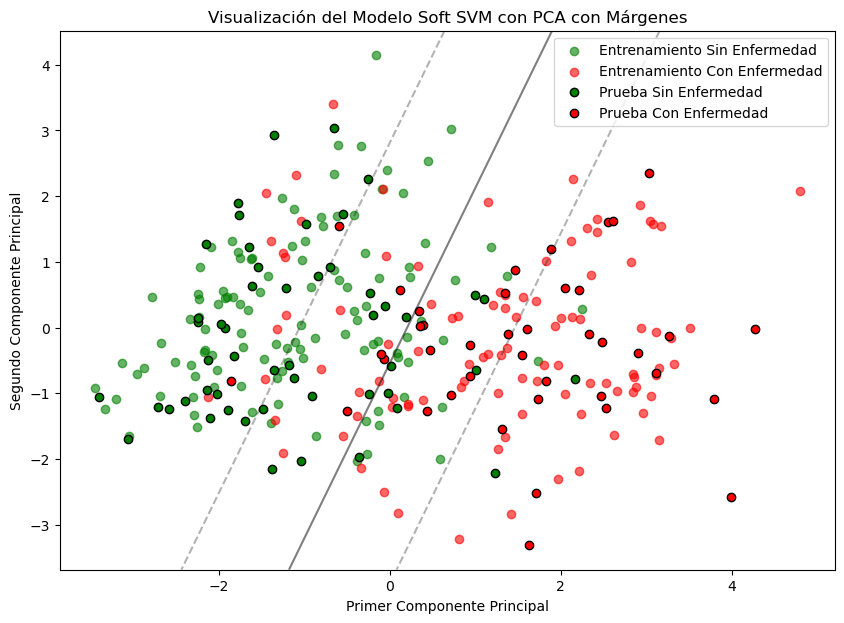

{'Exactitud (Accuracy)': 0.8351648351648352,
 'Precisión (Precision)': 0.7906976744186046,
 'Sensibilidad (Recall)': 0.85,
 'Especificidad (Specificity)': 0.8235294117647058,
 'Puntuación F1 (F1-Score)': 0.8192771084337349,
 'Tasa de Falsos Positivos (False Positive Rate)': 0.17647058823529413}

In [44]:
# Estimar un modelo Soft SVM ajustando el parámetro C a un valor bajo
soft_svm_model = SVC(kernel='linear', 
                     C = 0.1, 
                     random_state=911)
soft_svm_model.fit(X_train_pca, y_train)

# Predicciones con el modelo Soft SVM
y_pred_soft_svm = soft_svm_model.predict(X_test_pca)

# Graficar el modelo Soft SVM con kernel rbf y PCA incluyendo los márgenes

plt.figure(figsize=(10, 7))

# Graficar los datos de entrenamiento y prueba con colores diferenciados
for class_value in np.unique(y_train):
    indices = np.where(y_train == class_value)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1],
                c=color_map[class_value], alpha=0.6, label=f'Entrenamiento {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

for class_value in np.unique(y_test):
    indices = np.where(y_test == class_value)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1],
                c=color_map[class_value], edgecolors='k', label=f'Prueba {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Dibujar la frontera de decisión y los márgenes del modelo Soft SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = soft_svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Frontera de decisión
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
# Márgenes
ax.contour(xx, yy, Z, colors='k', levels=[-1, 1], alpha=0.3, linestyles=['--', '--'])

plt.title('Visualización del Modelo Soft SVM con PCA con Márgenes')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.show()

# Calcular los estadísticos basados en la matriz de confusión
# Verdaderos positivos (TP), Falsos positivos (FP), Verdaderos negativos (TN), Falsos negativos (FN)
conf_matrix = confusion_matrix(y_test, y_pred_soft_svm)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Exactitud (Accuracy)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Precisión (Precision)
precision = TP / float(TP + FP)

# Sensibilidad (Recall)
recall = TP / float(TP + FN)

# Especificidad (Specificity)
specificity = TN / float(TN + FP)

# Puntuación F1 (F1-Score)
f1_score = 2 * (precision * recall) / (precision + recall)

# Tasa de Falsos Positivos (False Positive Rate)
false_positive_rate = FP / float(FP + TN)

# Mostrar los resultados con etiquetas
resultados = {
    "Exactitud (Accuracy)": accuracy,
    "Precisión (Precision)": precision,
    "Sensibilidad (Recall)": recall,
    "Especificidad (Specificity)": specificity,
    "Puntuación F1 (F1-Score)": f1_score,
    "Tasa de Falsos Positivos (False Positive Rate)": false_positive_rate
}
resultados

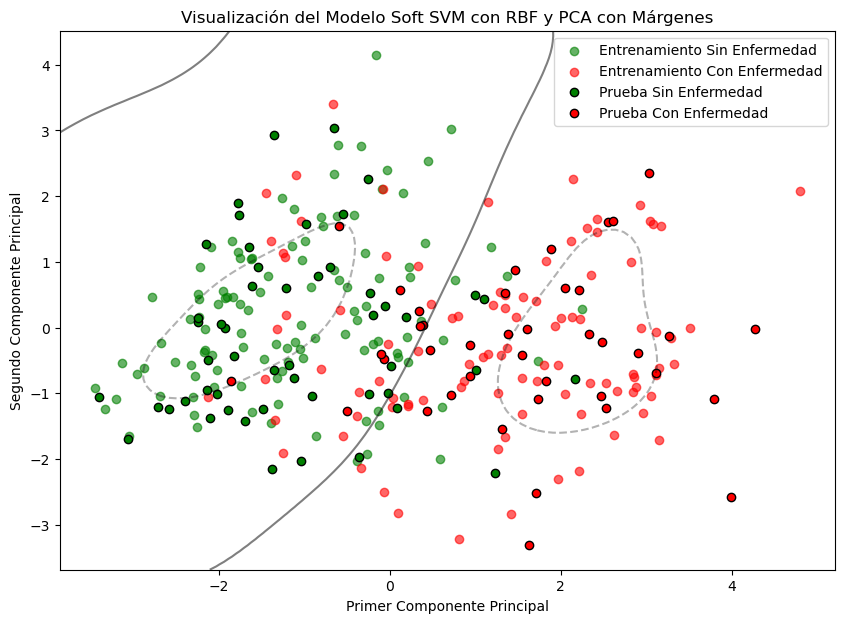

{'Exactitud (Accuracy)': 0.8241758241758241,
 'Precisión (Precision)': 0.8157894736842105,
 'Sensibilidad (Recall)': 0.775,
 'Especificidad (Specificity)': 0.8627450980392157,
 'Puntuación F1 (F1-Score)': 0.7948717948717949,
 'Tasa de Falsos Positivos (False Positive Rate)': 0.13725490196078433}

In [50]:
# Estimar un modelo Soft SVM ajustando el parámetro C y gamma en RBF
soft_svm_model = SVC(kernel='rbf', 
                     C = 0.1, 
                     gamma = 0.5,
                     random_state = 911)
soft_svm_model.fit(X_train_pca, y_train)

# Predicciones con el modelo Soft SVM
y_pred_soft_svm = soft_svm_model.predict(X_test_pca)

# Graficar el modelo Soft SVM con kernel rbf y PCA incluyendo los márgenes

plt.figure(figsize=(10, 7))

# Graficar los datos de entrenamiento y prueba con colores diferenciados
for class_value in np.unique(y_train):
    indices = np.where(y_train == class_value)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1],
                c=color_map[class_value], alpha=0.6, label=f'Entrenamiento {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

for class_value in np.unique(y_test):
    indices = np.where(y_test == class_value)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1],
                c=color_map[class_value], edgecolors='k', label=f'Prueba {"Sin Enfermedad" if class_value == 0 else "Con Enfermedad"}')

# Dibujar la frontera de decisión y los márgenes del modelo Soft SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = soft_svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Frontera de decisión
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
# Márgenes
ax.contour(xx, yy, Z, colors='k', levels=[-1, 1], alpha=0.3, linestyles=['--', '--'])

plt.title('Visualización del Modelo Soft SVM con RBF y PCA con Márgenes')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.show()

# Calcular los estadísticos basados en la matriz de confusión
# Verdaderos positivos (TP), Falsos positivos (FP), Verdaderos negativos (TN), Falsos negativos (FN)
conf_matrix = confusion_matrix(y_test, y_pred_soft_svm)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Exactitud (Accuracy)
accuracy = (TP + TN) / float(TP + TN + FP + FN)

# Precisión (Precision)
precision = TP / float(TP + FP)

# Sensibilidad (Recall)
recall = TP / float(TP + FN)

# Especificidad (Specificity)
specificity = TN / float(TN + FP)

# Puntuación F1 (F1-Score)
f1_score = 2 * (precision * recall) / (precision + recall)

# Tasa de Falsos Positivos (False Positive Rate)
false_positive_rate = FP / float(FP + TN)

# Mostrar los resultados con etiquetas
resultados = {
    "Exactitud (Accuracy)": accuracy,
    "Precisión (Precision)": precision,
    "Sensibilidad (Recall)": recall,
    "Especificidad (Specificity)": specificity,
    "Puntuación F1 (F1-Score)": f1_score,
    "Tasa de Falsos Positivos (False Positive Rate)": false_positive_rate
}
resultados